<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/06_cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공개 이미지 라이브러리

노트북 파일명: 06-cnn1.ipynb



실행후에 RESTART RUNTIME 버튼이 보이면 클릭해서 런타임 재시작

In [1]:
!pip install matplotlib==3.3.0

## CIFAR-10, CIFAR-100

https://www.cs.toronto.edu/~kriz/cifar.html  

**CIFAR-10**  
10개의 카테고리, 60,000장의 32x32 컬러 이미지  
분류를 위한 기초 데이터 셋  

**CIFAR-100**  
100개의 카테고리 60,000장의 32x32 컬러 이미지  

In [2]:
from tensorflow import keras

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:

print ("Number of train images: ", x_train.shape[0])
print ("Number of test images:", x_test.shape[0])

# color image
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])

class_names = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
#class_names = ['airplain', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Number of train images:  50000
Number of test images: 10000
Number of channels: 3
Image size: 32 32


In [5]:
!apt install fonts-nanum-coding

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum-coding
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 1,083 kB of archives.
After this operation, 4,610 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-coding all 2.5-1 [1,083 kB]
Fetched 1,083 kB in 1s (879 kB/s)
Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [7]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
fontprop = fm.FontProperties(fname=path)

In [8]:
from tensorflow.keras.utils import to_categorical

# One-Hot Encoding (숫자 -> One-Hot Vector) and normalize
NUM_CLASSES = 10
if y_test.shape[1] == 1:
    x_train = x_train/255.
    x_test = x_test/255.
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

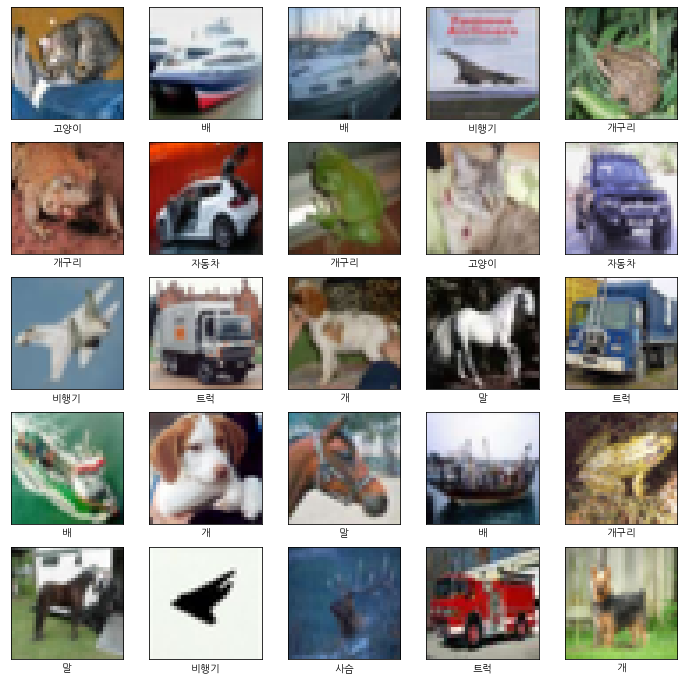

In [9]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i].argmax()], fontproperties=fontprop)
plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5292 - accuracy: 0.4404 - val_loss: 1.2163 - val_accuracy: 0.5649
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1575 - accuracy: 0.5890 - val_loss: 1.0820 - val_accuracy: 0.6149
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0125 - accuracy: 0.6423 - val_loss: 1.0597 - val_accuracy: 0.6179
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9109 - accuracy: 0.6795 - val_loss: 0.9569 - val_accuracy: 0.6682
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8431 - accuracy: 0.7045 - val_loss: 0.9071 - val_accuracy: 0.6826
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7835 - accuracy: 0.7274 - val_loss: 0.9322 - val_accuracy: 0.6875
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7292 - accuracy: 0.7452 - val_loss: 0.8808 - val_accuracy:

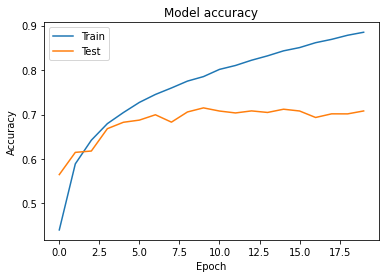

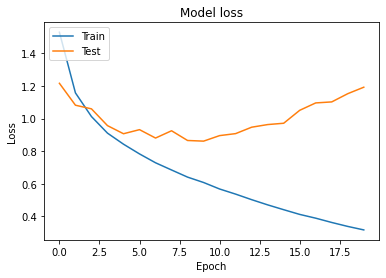

In [12]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**모델 레이어의 증가**

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)         

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5043 - accuracy: 0.4474 - val_loss: 1.1793 - val_accuracy: 0.5791
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0065 - accuracy: 0.6425 - val_loss: 0.9099 - val_accuracy: 0.6827
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8136 - accuracy: 0.7142 - val_loss: 0.8604 - val_accuracy: 0.6955
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6932 - accuracy: 0.7545 - val_loss: 0.7718 - val_accuracy: 0.7353
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6026 - accuracy: 0.7876 - val_loss: 0.7697 - val_accuracy: 0.7414
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5235 - accuracy: 0.8149 - val_loss: 0.7546 - val_accuracy: 0.7538
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4593 - accuracy: 0.8381 - val_loss: 0.7441 - val_accuracy:

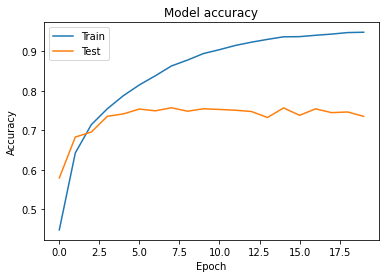

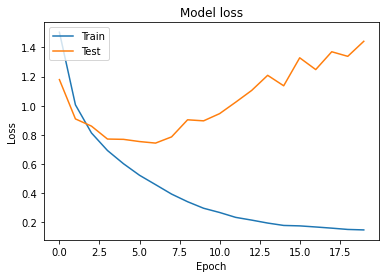

In [15]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## STL-10

https://cs.stanford.edu/~acoates/stl10/  
10 classes: airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck.  
Images are 96x96 pixels, color.  
500 training images (10 pre-defined folds), 800 test images per class.  

참조 소스코드 URL: https://github.com/matanby/keras-examples/blob/master/stl10.ipynb  


In [16]:
import os
import urllib.request as urllib
import tarfile
import sys
import numpy as np

In [17]:
# the dimensions of each image in the STL-10 dataset (96x96x3).
HEIGHT, WIDTH, DEPTH = 96, 96, 3

# number of classes in the STL-10 dataset.
N_CLASSES = 10

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './stl10_data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
TRAIN_DATA_PATH = DATA_DIR + '/stl10_binary/train_X.bin'

# path to the binary test file with image data
TEST_DATA_PATH = DATA_DIR + '/stl10_binary/test_X.bin'

# path to the binary train file with labels
TRAIN_LABELS_PATH = DATA_DIR + '/stl10_binary/train_y.bin'

# path to the binary test file with labels
TEST_LABELS_PATH = DATA_DIR + '/stl10_binary/test_y.bin'

# path to class names file
CLASS_NAMES_PATH = DATA_DIR + '/stl10_binary/class_names.txt'

In [18]:
def read_labels(path_to_labels):
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, DEPTH, WIDTH, HEIGHT))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def download_and_extract():
    # if the dataset already exists locally, no need to download it again.
    if all((
        os.path.exists(TRAIN_DATA_PATH),
        os.path.exists(TRAIN_LABELS_PATH),
        os.path.exists(TEST_DATA_PATH),
        os.path.exists(TEST_LABELS_PATH),
    )):
        return

    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
        
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                                                          float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)


def load_dataset():
    # download the extract the dataset.
    download_and_extract()

    # load the train and test data and labels.
    x_train = read_all_images(TRAIN_DATA_PATH)
    y_train = read_labels(TRAIN_LABELS_PATH)
    x_test = read_all_images(TEST_DATA_PATH)
    y_test = read_labels(TEST_LABELS_PATH)

    # convert all images to floats in the range [0, 1]
    x_train = x_train.astype('float32')
    x_train = (x_train - 127.5) / 127.5
    x_test = x_test.astype('float32')
    x_test = (x_test - 127.5) / 127.5
    
    # convert the labels to be zero based.
    y_train -= 1
    y_test -= 1

    # convert labels to hot-one vectors.
    y_train = keras.utils.to_categorical(y_train, N_CLASSES)
    y_test = keras.utils.to_categorical(y_test, N_CLASSES)

    return (x_train, y_train), (x_test, y_test)

In [19]:
(x_train, y_train), (x_test, y_test) = load_dataset()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

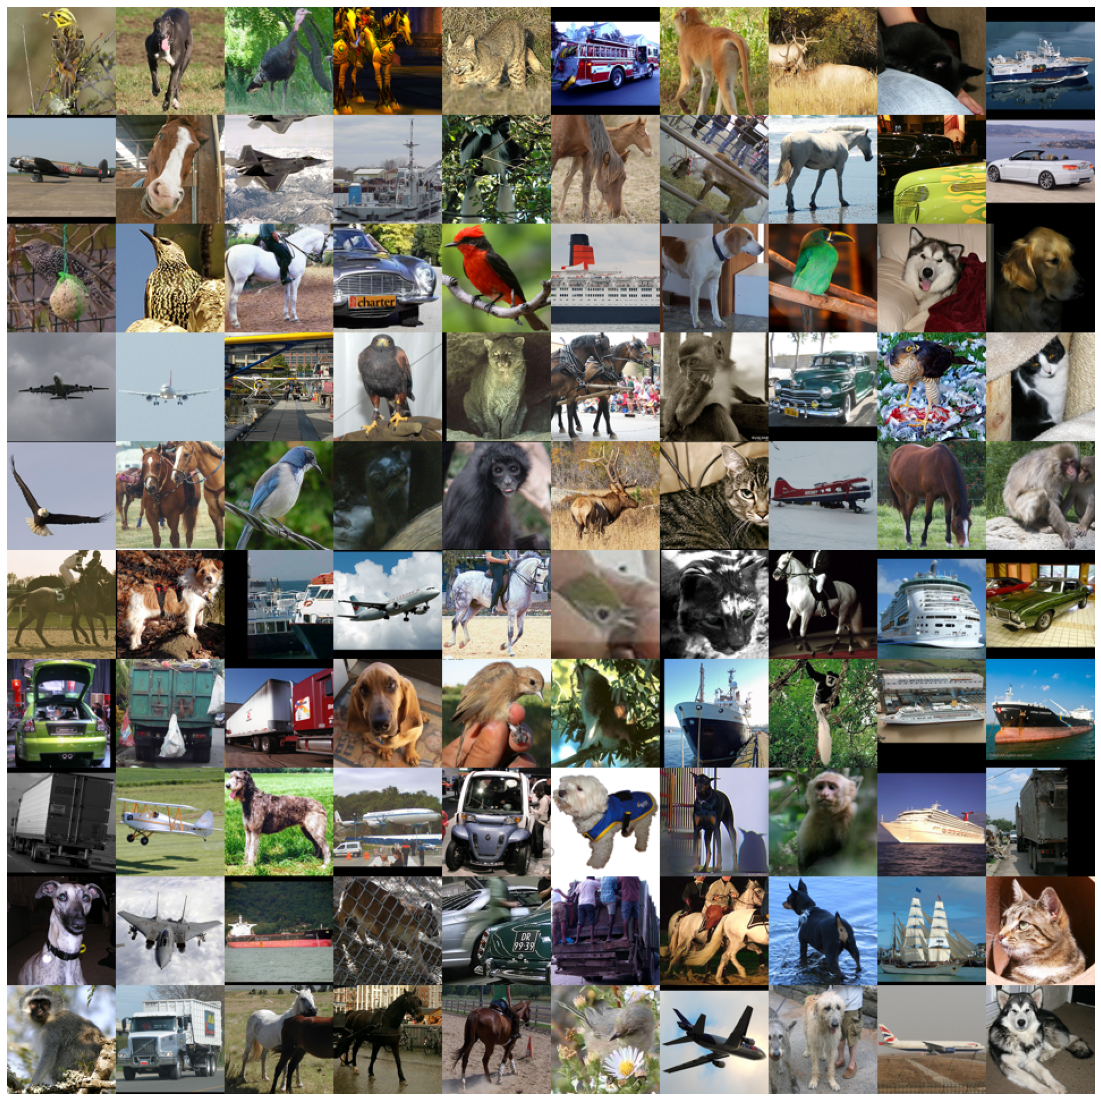

In [20]:
def plot_images(images, n_images):
    _, h, w, d = images.shape
    # create an array that will store the images to plot.
    canvas = np.empty((h * n_images, w * n_images, d), dtype='uint8')

    for i in range(n_images):
        img_column = images[i * n_images:(i + 1) * n_images]
        for j in range(n_images):
            if j >= img_column.shape[0]:
                break

            # transform images to the range [0, 255]
            img = img_column[j]
            img = ((img * 127.5) + 127.5).clip(0, 255).astype('uint8')            
            canvas[i * h:(i + 1) * h, j * w:(j + 1) * w] = img

    plt.figure(figsize=(2 * n_images, 2 * n_images))
    plt.axis('off')
    cmap = 'gray' if d == 1 else None
    plt.imshow(canvas.squeeze(), origin="upper", cmap=cmap)
    plt.show()

plot_images(x_train, 10)

In [21]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
157/157 [==============================] - 4s 23ms/step - loss: 1.8603 - accuracy: 0.3056 - val_loss: 1.5813 - val_accuracy: 0.3893
Epoch 2/20
157/157 [==============================] - 3s 18ms/step - loss: 1.4208 - accuracy: 0.4780 - val_loss: 1.3729 - val_accuracy: 0.4899
Epoch 3/20
157/157 [==============================] - 3s 18ms/step - loss: 1.1644 - accuracy: 0.5732 - val_loss: 1.2881 - val_accuracy: 0.5321
Epoch 4/20
157/157 [==============================] - 3s 17ms/step - loss: 0.9181 - accuracy: 0.6688 - val_loss: 1.3548 - val_accuracy: 0.5288
Epoch 5/20
157/157 [==============================] - 3s 18ms/step - loss: 0.6160 - accuracy: 0.7858 - val_loss: 1.4650 - val_accuracy: 0.5462
Epoch 6/20
157/157 [==============================] - 3s 18ms/step - loss: 0.3696 - accuracy: 0.8780 - val_loss: 1.7027 - val_accuracy: 0.5365
Epoch 7/20
157/157 [==============================] - 3s 18ms/step - loss: 0.1921 - accuracy: 0.9380 - val_loss: 2.1066 - val_accuracy: 0.5403

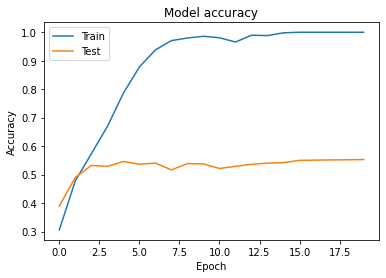

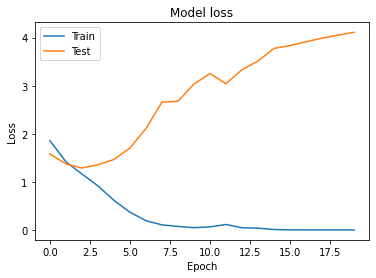

In [23]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## imagenet

https://github.com/jkjung-avt/keras_imagenet  

이미지넷 2012 다운로드 (아카데미 토렌트)  
https://academictorrents.com/collection/imagenet-2012  
validation set 정리방법  
https://github.com/developer0hye/Setup-for-Imagenet  

## imagenette



subset of imageNet  
https://github.com/fastai/imagenette  


In [10]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz

--2020-11-04 14:19:20--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.204.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.204.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98948031 (94M) [application/x-tar]
Saving to: ‘imagenette2-160.tgz’

imagenette2-160.tgz 100%[===================>]  94.36M  38.1MB/s    in 2.5s    

2020-11-04 14:19:23 (38.1 MB/s) - ‘imagenette2-160.tgz’ saved [98948031/98948031]



In [ ]:
!tar xvzf imagenette2-160.tgz

In [36]:
json_path = keras.utils.get_file("imagenet_class_index.json", "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json")

40960/35363 [==================================] - 0s 0us/step


In [37]:
import json
# Opening JSON file 
with open(json_path) as json_file: 
    imagenet_class_index = json.load(json_file) 

In [40]:
imagenet_class_index['0']

['n01440764', 'tench']

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_input(x):
  x = x/255.
  return x
datagen_train = ImageDataGenerator(preprocessing_function = preprocess_input)
training_set = datagen_train.flow_from_directory('imagenette2-160/train',
                                                 target_size = (160, 160),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
datagen_test = ImageDataGenerator(preprocessing_function = preprocess_input)
test_set = datagen_test.flow_from_directory('imagenette2-160/val',
                                                 target_size = (160, 160),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


imagenette 클래스 명 정의하기

In [64]:
class_indices = list(training_set.class_indices.keys())
class_values = list(training_set.class_indices.values())
class_names=[]
for i in range(1000):
  if imagenet_class_index['{}'.format(i)][0] in class_indices:
    class_names.append(imagenet_class_index['{}'.format(i)][1])

In [67]:
class_names

['tench',
 'English_springer',
 'cassette_player',
 'chain_saw',
 'church',
 'French_horn',
 'garbage_truck',
 'gas_pump',
 'golf_ball',
 'parachute']

테스트 데이터 첫번째 배치 읽어들이기

In [ ]:
x_test, y_test = test_set[0]

이미지 확인해보기

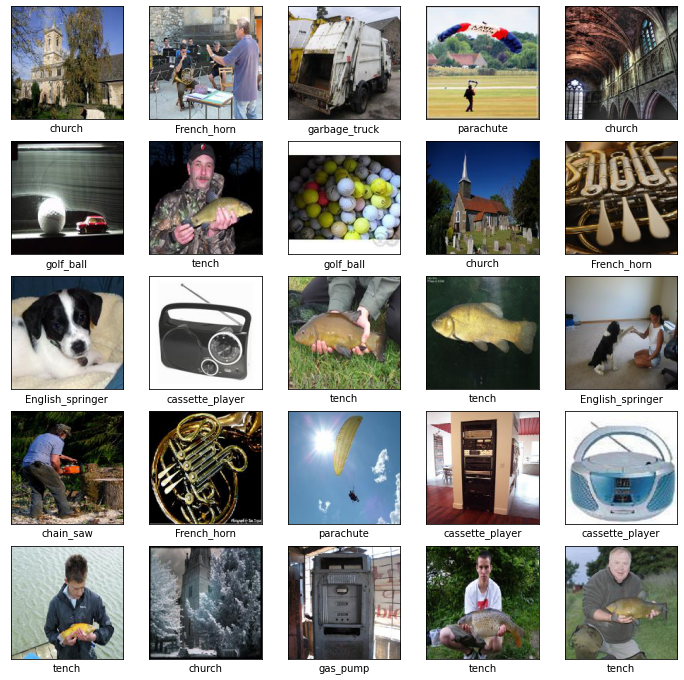

In [66]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i].argmax()])
plt.show()

In [68]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(160, 160, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

학습하기 (epoch은 100정도가 적당)

In [69]:
history = model.fit(training_set, steps_per_epoch=16,
          validation_data=test_set, 
          validation_steps=8, 
          epochs=10)

Epoch 1/10
16/16 [==============================] - 1s 87ms/step - loss: 2.4706 - accuracy: 0.1191 - val_loss: 2.2899 - val_accuracy: 0.1211
Epoch 2/10
16/16 [==============================] - 1s 75ms/step - loss: 2.2611 - accuracy: 0.1445 - val_loss: 2.2573 - val_accuracy: 0.1328
Epoch 3/10
16/16 [==============================] - 1s 75ms/step - loss: 2.1431 - accuracy: 0.2188 - val_loss: 2.1118 - val_accuracy: 0.2305
Epoch 4/10
16/16 [==============================] - 1s 76ms/step - loss: 2.0315 - accuracy: 0.2637 - val_loss: 1.9840 - val_accuracy: 0.3047
Epoch 5/10
16/16 [==============================] - 1s 76ms/step - loss: 1.9936 - accuracy: 0.3183 - val_loss: 1.9984 - val_accuracy: 0.3203
Epoch 6/10
16/16 [==============================] - 1s 75ms/step - loss: 1.8521 - accuracy: 0.3496 - val_loss: 1.8587 - val_accuracy: 0.3164
Epoch 7/10
16/16 [==============================] - 1s 75ms/step - loss: 1.8752 - accuracy: 0.3789 - val_loss: 1.7369 - val_accuracy: 0.4414
Epoch 8/10
16

# Optimizer

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

# 구글 코랩에서 애니메이션 표시용
rc('animation', html='jshtml')

여러가지 옵티마이저 설정 및 테스트

In [70]:
import tensorflow as tf

#opt = tf.keras.optimizers.SGD(learning_rate=0.45)
#opt = tf.keras.optimizers.SGD(learning_rate=0.45, momentum=0.55)
#opt = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.55)
#opt = tf.keras.optimizers.SGD(learning_rate=0.2)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.2)
#opt = tf.keras.optimizers.Adam(learning_rate=0.45)
opt = tf.keras.optimizers.Adam(learning_rate=0.2)

손실 함수  
$ L = (0.4w_1^2 + 4w_2^2) / 2$  

In [71]:
# weights 초기화
w1 = tf.Variable(0.45)
w2 = tf.Variable(0.45)
loss = lambda: (4*0.1*w1**2 + 4*w2**2)/2.0       # d(loss)/d(dw) == [w1, w2]

In [72]:
x_stt = -0.5
x_end = 0.5
y_stt = -0.5
y_end = 0.5

x = np.linspace(x_stt, x_end, 21)
y = np.linspace(y_stt, y_end, 21)
z = np.array([(4*0.1*i*i+4*j*j)/2.0 for j in y for i in x])

X, Y = np.meshgrid(x, y)
Z = z.reshape(21, 21)

w1_log = []
w2_log = []

for epoch in range(0,100):
  w1_log.append(w1.numpy())
  w2_log.append(w2.numpy())
  step_count = opt.minimize(loss, [w1, w2]).numpy()
  # The first step is `-learning_rate*sign(grad)`  
print(w1.numpy(), w2.numpy())

0.001980061 0.001979989


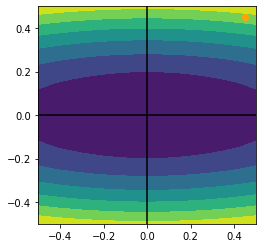

In [73]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.contourf(X,Y,Z)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis([x_stt,x_end,y_stt,y_end])
ax2, = ax.plot([], [], color='orange')
ax3, = ax.plot([], [], 'o', color='orange')

def animate(i):
  ax2.set_data(w1_log[0:i], w2_log[0:i])
  ax3.set_data(w1_log[i], w2_log[i])
  return (ax2,)

i = np.arange(len(w1_log))
ani = matplotlib.animation.FuncAnimation(fig, animate,
                                         frames=i, interval=100)
ani

**minimize의 내부**  
  
`minimize` 대신에 `GradientTape`와  
`opt.apply_gradients`를 사용하는 방법  

In [9]:
# weights 초기화
w1 = tf.Variable(0.45)
w2 = tf.Variable(0.45)

w1_log = []
w2_log = []

for epoch in range(0,1):
  w1_log.append(w1.numpy())
  w2_log.append(w2.numpy())

  #step_count = opt.minimize(loss, [w1, w2]).numpy()
  with tf.GradientTape() as tape:
    total_loss = loss()
  grads = tape.gradient(total_loss, [w1, w2])
  opt.apply_gradients(zip(grads, [w1,w2]))

  print('grads =', grads[0].numpy(), grads[1].numpy())
  print('w =', w1.numpy(),w2.numpy())

grads = 0.17999999 1.7999998
w = 0.369 -0.35999992


**gradient descent optimizer**  

$
\begin{align}
L &= (0.4w_1^2 + 4w_2^2)/2 \\
\\
{\partial L \over \partial w_1} &= 0.4 w_1 =0.4\cdot0.45 \\
\\
w_1 &\rightarrow w_1 - \eta{\partial L \over \partial w_1}
\end{align}
$

In [ ]:
[0.45 - 0.45*0.4*0.45, 0.45 - 0.45*4*0.45]

[0.369, -0.36000000000000004]